In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df = pd.read_csv('dataset/cleaned_us_accident_data.csv')

In [3]:
sampled_data = df.sample(frac=0.1, random_state=42)
features = sampled_data[['start_lat', 'start_lng']]

In [7]:
sampled_data = df[['start_lat', 'start_lng']].astype('float32')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sampled_data)

In [8]:
from hdbscan import HDBSCAN

clusterer = HDBSCAN(min_cluster_size=10, memory='memory_directory')  # memory_directory is where to cache intermediate results
labels = clusterer.fit_predict(data_scaled)


/Users/buttow6ki/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/buttow6ki/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


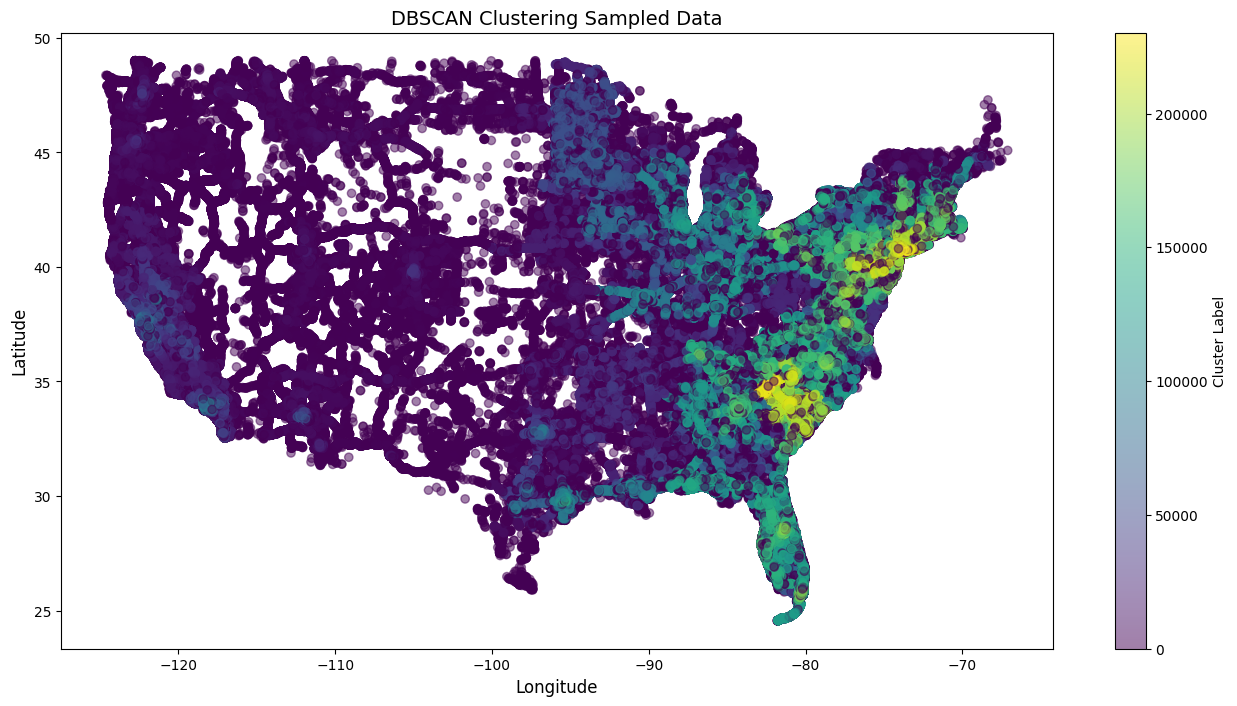

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8)) 

scatter = ax.scatter(sampled_data['start_lng'], sampled_data['start_lat'], c=labels, cmap='viridis', alpha=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

ax.set_title('DBSCAN Clustering Sampled Data', fontsize=14)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.show()
